A data-set related to smart water was obtained and machine learning algorithm was trained to show how how system works.
Upon installation of the proposed design, we can collect the required data and use that live data for prediction
The data-set contained the following contents : ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity and Potability
The ML algorithm is initially trained with the collected data, and later can be used for prediction.


In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored 
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
print('\nImported the libraries')


Imported the libraries


In [39]:
pd.options.mode.copy_on_write = True # Allow re-write on variable
sns.set_style('darkgrid') # Seaborn style
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature

In [40]:
print('\nConfigured the libraries')


Configured the libraries


In [41]:
# importing the dataset with 
data = pd.read_csv('/kaggle/input/water-data/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [43]:
data.describe().loc[['min', '50%', 'mean', 'max', 'std']].T.style.background_gradient(axis=1)

,min,50%,mean,max,std
ph,0.000000,7.036752,7.080795,14.000000,1.594320
Hardness,47.432000,196.967627,196.369496,323.124000,32.879761
Solids,320.942611,20927.833607,22014.092526,61227.196008,8768.570828
Chloramines,0.352000,7.130299,7.122277,13.127000,1.583085
Sulfate,129.000000,333.073546,333.775777,481.030642,41.416840
Conductivity,181.483754,421.884968,426.205111,753.342620,80.824064
Organic_carbon,2.200000,14.218338,14.284970,28.300000,3.308162
Trihalomethanes,0.738000,66.622485,66.396293,124.000000,16.175008
Turbidity,1.450000,3.955028,3.966786,6.739000,0.780382
Potability,0.000000,0.000000,0.390110,1.000000,0.487849


In [44]:
columns_name = data.columns
for index, col_name in enumerate(columns_name):
    print(index, col_name)

0 ph
1 Hardness
2 Solids
3 Chloramines
4 Sulfate
5 Conductivity
6 Organic_carbon
7 Trihalomethanes
8 Turbidity
9 Potability


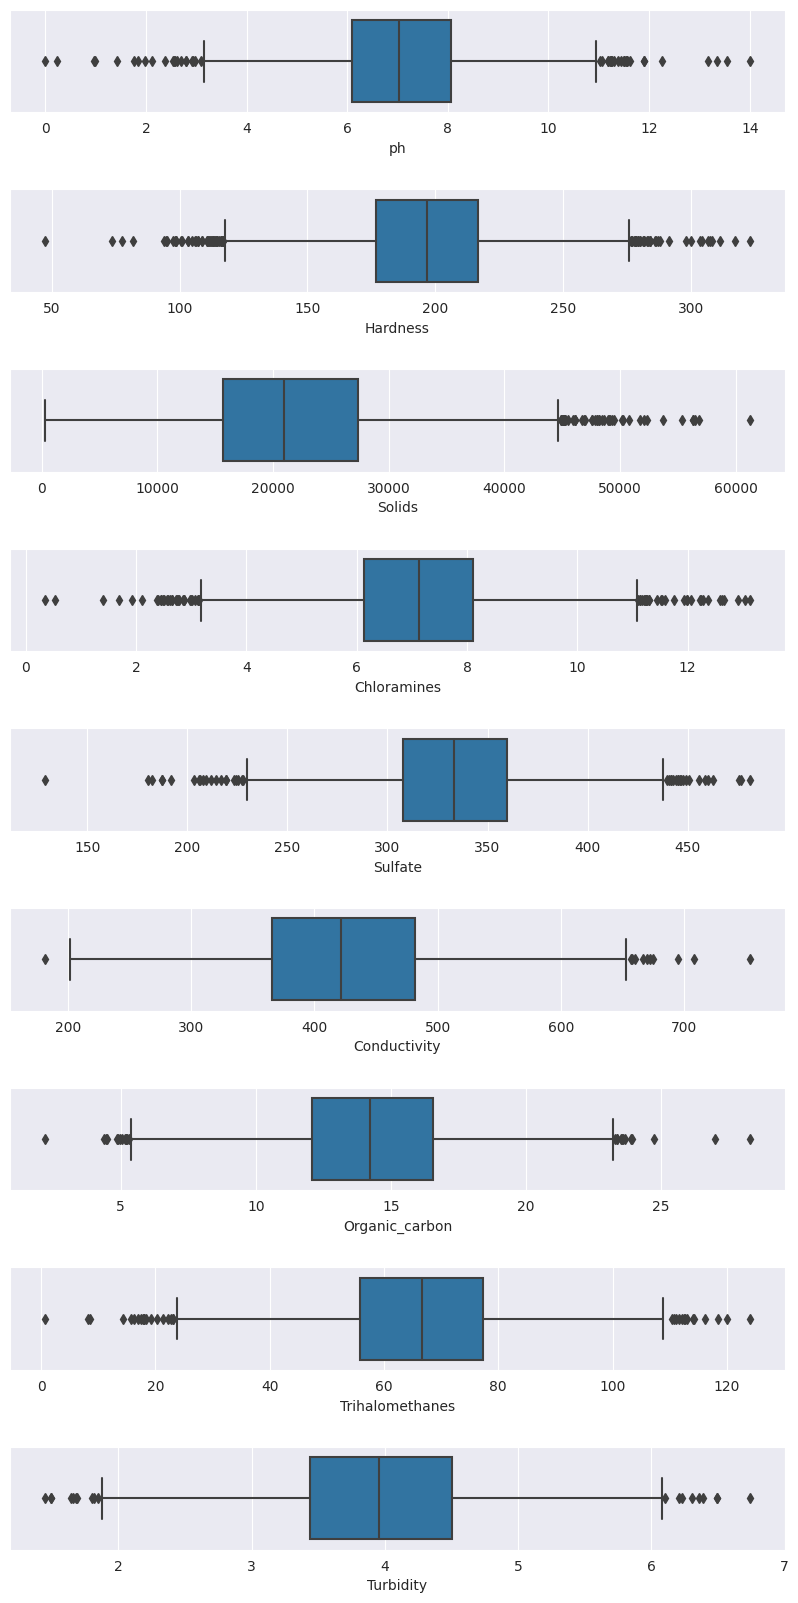

In [45]:
fig, ax = plt.subplots(9, 1, figsize=(10, 20))
fig.subplots_adjust(hspace=0.75)
for i in range(9) :
    # Ax
    sns.boxplot(x=columns_name[i], data=data, ax=ax[i])

Potability
0    1998
1    1278
Name: count, dtype: int64


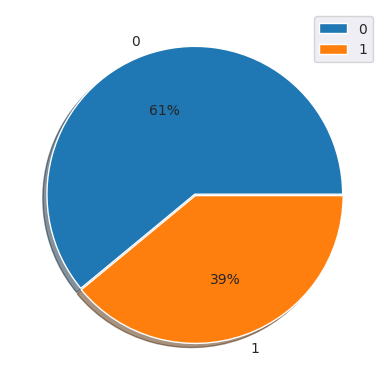

In [46]:
tar = data['Potability'].value_counts()
print(tar)

plt.pie(tar, labels=[0, 1], explode=[0, 0.01], autopct='%.f%%', shadow=True)
plt.legend()
plt.show()

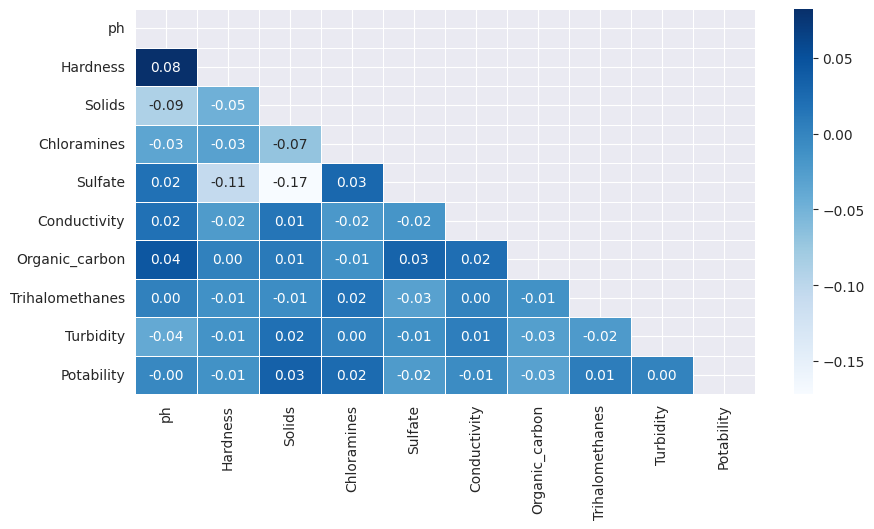

In [47]:
corr = data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
plt.show()

In [49]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [50]:
print("Number of all samples : ", len(data))

Number of all samples :  3276


In [51]:
print('Percentage(%) of nulls for each columns : \n')
print((data.isna().sum()/len(data))*100)

Percentage(%) of nulls for each columns : 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


In [52]:
print("For Potability=1")
data[data.Potability==1][['ph', 'Sulfate', 'Trihalomethanes']].median()

For Potability=1


ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

In [53]:
print("For Potability=1")
data[data.Potability==0][['ph', 'Sulfate', 'Trihalomethanes']].median()

For Potability=1


ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

In the preprocessing stage, we are filling the NA values with median of the dataset

In [56]:
data['ph'] = data['ph'].fillna(value=data['ph'].median())
data['Sulfate'] = data['Sulfate'].fillna(value=data['Sulfate'].median())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(value=data['Trihalomethanes'].median())

In [57]:
data.isna().sum().sum()

0

In [59]:
X = data.drop(columns='Potability')
y = data.Potability

In [60]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df.describe().loc[['min', 'mean', 'std', 'max']].T.style.background_gradient(axis=1)

,min,mean,std,max
ph,0.000000,0.505300,0.105003,1.000000
Hardness,0.000000,0.540231,0.119263,1.000000
Solids,0.000000,0.356173,0.143968,1.000000
Chloramines,0.000000,0.529963,0.123921,1.000000
Sulfate,0.000000,0.581223,0.102672,1.000000
Conductivity,0.000000,0.427940,0.141336,1.000000
Organic_carbon,0.000000,0.463026,0.126750,1.000000
Trihalomethanes,0.000000,0.532763,0.127939,1.000000
Turbidity,0.000000,0.475853,0.147548,1.000000


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [64]:
# A function to plot "Confusion Matrix" and "Classification Report"
def plot_result(y_pred) :
    '''
    1) plot Confusion Matrix
    2) plot Classification Report
    '''
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    fig.tight_layout()
    #AX left - Confusion Matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    ax[0]=sns.heatmap(cm, cmap='Blues', annot=True, fmt='', linewidths=0.5, ax=ax[0])
    ax[0].set_xlabel('Prediced labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['0', '1'])
    ax[0].yaxis.set_ticklabels(['0', '1'])
    #
    # AX Right - Classification Report
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    ax[1] = sns.heatmap(cr, cmap='Blues', annot=True, fmt='0.3f', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

In [63]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 1, 1000],
    'class_weight' : ['balanced', None],
    'solver' : ['liblinear', 'sag'],
    'penalty' : ['l2'],
    'n_jobs' : [-1],
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=20).fit(X_train, y_train)

print(colored('Tuned hyper parameters :\n{}'.format(lr_cv.best_params_), 'blue'))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  

Tuned hyper parameters :
{'C': 0.001, 'class_weight': None, 'n_jobs': -1, 'penalty': 'l2', 'solver': 'liblinear'}


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


In [67]:
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print(colored('LogisticRegression Score : {}'.format(lr_score), 'green'))

LogisticRegression Score : 0.627


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


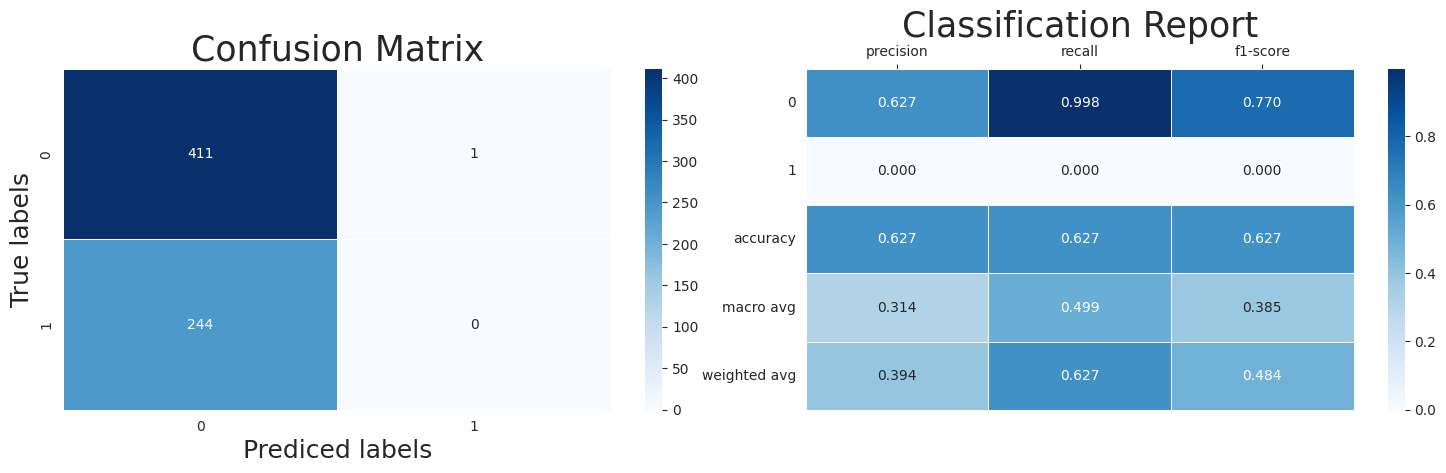

In [68]:
plot_result(y_pred_lr)

In [69]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_estimators' : [1000],
    'criterion' : ['log_loss'],
    'max_features' : ['sqrt'],
    'n_jobs' : [-1]
}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(estimator=rf, param_grid=parameters, cv=20).fit(X_train, y_train)
print(colored('Tuned hyper parameters :\n{}'.format(rf_cv.best_params_), 'blue'))

Tuned hyper parameters :
{'criterion': 'log_loss', 'max_features': 'sqrt', 'n_estimators': 1000, 'n_jobs': -1}


In [70]:
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print(colored('RandomForestClassifier Score : {}'.format(rf_score), 'green'))

RandomForestClassifier Score : 0.695


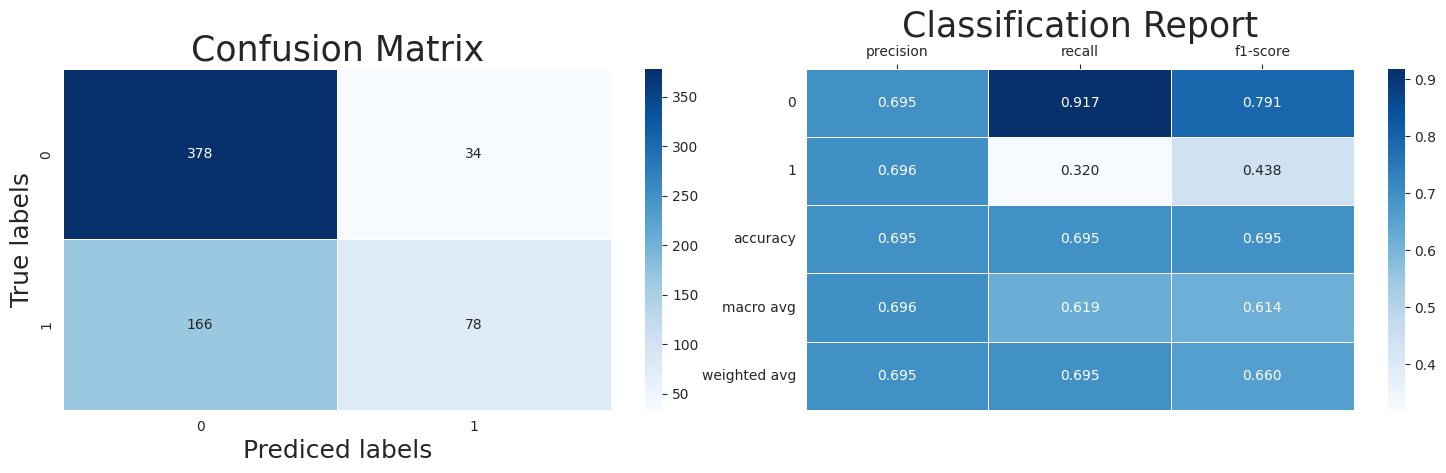

In [71]:
plot_result(y_pred_rf)

In [72]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'hidden_layer_sizes' : [500],
    'activation' : ['logistic'],
    'alpha' : [0.0001],
    'batch_size' : [200],
    
}

mlp = MLPClassifier()
mlp_cv = GridSearchCV(estimator=mlp, param_grid=parameters, cv=20).fit(X_train, y_train)

print(colored('Tuned hyper parameters :\n{}'.format(mlp_cv.best_params_), 'blue'))

Tuned hyper parameters :
{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 200, 'hidden_layer_sizes': 500}


In [73]:
mlp = MLPClassifier(**mlp_cv.best_params_).fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

mlp_score = round(mlp.score(X_test, y_test), 3)
print(colored('MLPClassifier Score : {}'.format(mlp_score), 'green'))

MLPClassifier Score : 0.63


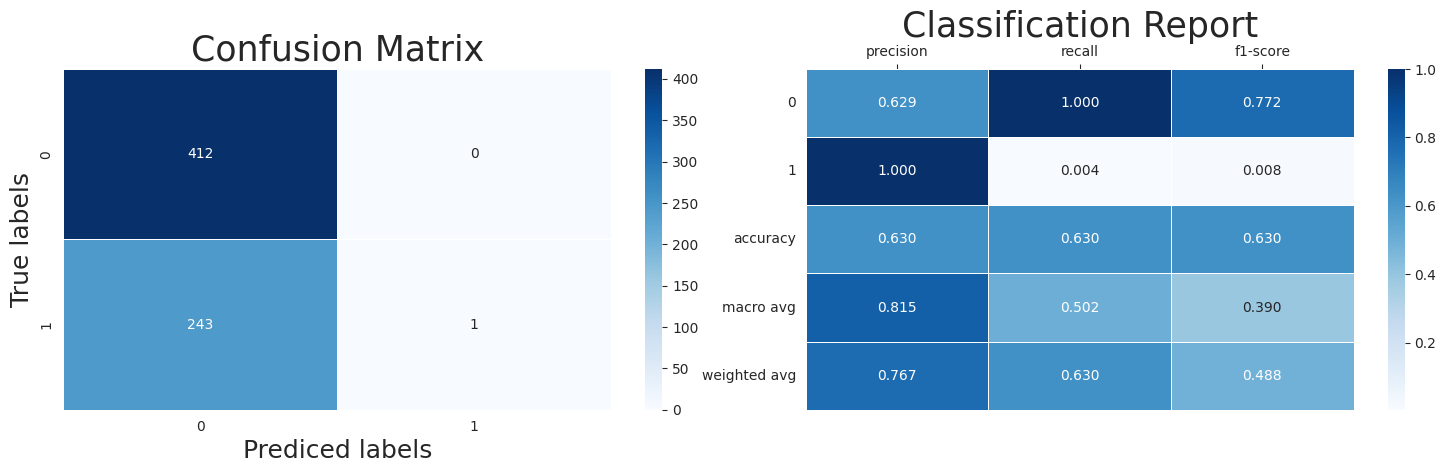

In [74]:
plot_result(y_pred_mlp)

In [75]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

print(colored('Tuned hyper parameters :\n{}'.format(knn_cv.best_params_), 'blue'))

Tuned hyper parameters :
{'n_neighbors': 35, 'p': 1, 'weights': 'distance'}


In [76]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print(colored('KNeighborsClassifier Score : {}'.format(knn_score), 'green'))

KNeighborsClassifier Score : 0.616


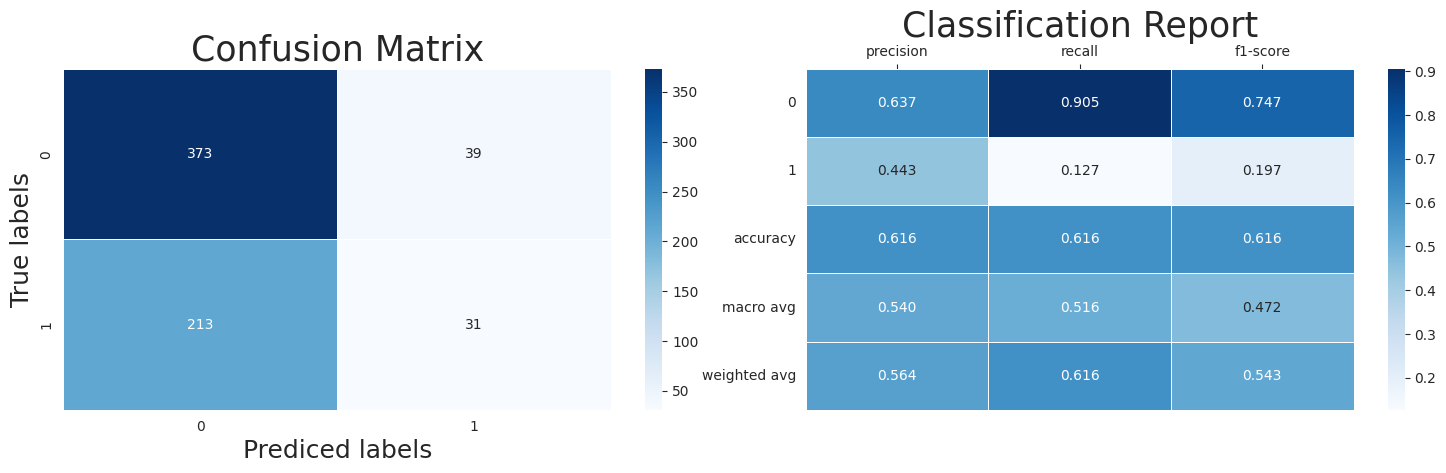

In [77]:
plot_result(y_pred_knn)

In [78]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'KNeighborsClassifier', 'MLPClassifier'],
    'Score' : [rf_score, lr_score,  knn_score, mlp_score]
})


result.style.background_gradient()

,Algorithm,Score
0,RandomForestClassifier,0.695000
1,LogisticRegression,0.627000
2,KNeighborsClassifier,0.616000
3,MLPClassifier,0.630000


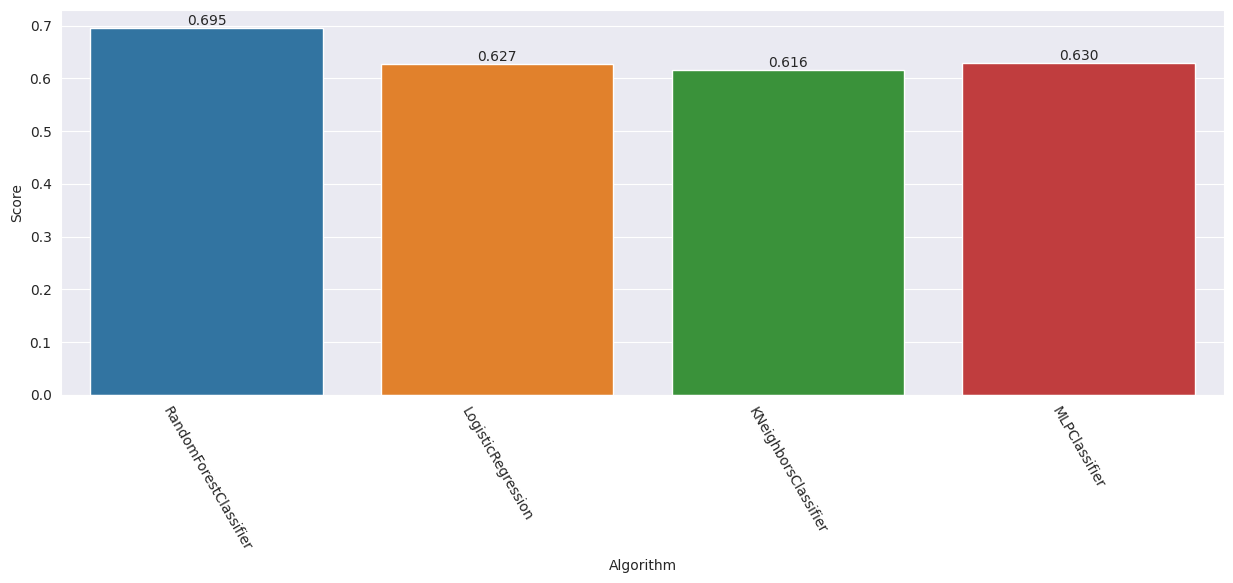

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()